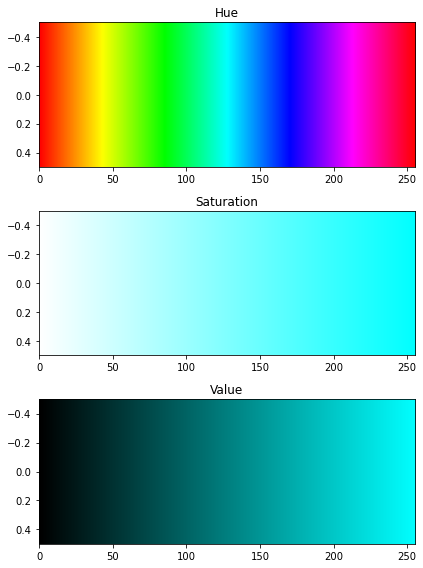

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Hue color bar
hsv_hue = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_hue_rgb = mcolors.hsv_to_rgb(np.concatenate([hsv_hue, np.ones_like(hsv_hue), np.ones_like(hsv_hue)], 2))
axs[0].imshow(hsv_hue_rgb, aspect='auto')
axs[0].set_title('Hue')

# Saturation color bar
hsv_saturation = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_saturation_rgb = mcolors.hsv_to_rgb(np.concatenate([np.ones_like(hsv_saturation) * 0.5, hsv_saturation, np.ones_like(hsv_saturation)], 2))
axs[1].imshow(hsv_saturation_rgb, aspect='auto')
axs[1].set_title('Saturation')

# Value color bar
hsv_value = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_value_rgb = mcolors.hsv_to_rgb(np.concatenate([np.ones_like(hsv_value) * 0.5, np.ones_like(hsv_value), hsv_value], 2))
axs[2].imshow(hsv_value_rgb, aspect='auto')
axs[2].set_title('Value')

# Set space between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [5]:
import json
import pandas as pd

CO_NUMS = list(range(1, 18))
EX_NUMS = list(range(1, 18))
co_json_datas = []
ex_json_datas = []
for name in CO_NUMS:
    with open('./CO/' + str(name) + '/data.json', 'r') as json_file:
        data = json.load(json_file)
    co_json_datas.append(data)
for name in EX_NUMS:
    with open('./EX/' + str(name) + '/data.json', 'r') as json_file:
        data = json.load(json_file)
    ex_json_datas.append(data)
output_data = {'Pid': [], 'Group': [],'Mental1': [],'Physical1': [],'Temporal1': [],'Performance1': [],'Effort1': [],'Frustration1': [],
           'Mental2': [], 'Physical2': [],'Temporal2': [],'Performance2': [],'Effort2': [],'Frustration2': []}
for idx, data in enumerate(ex_json_datas):
    output_data['Pid'].append(idx)
    output_data['Group'].append(0)
    output_data['Mental1'].append(data["nasa_1"][0])
    output_data['Physical1'].append(data["nasa_1"][1])
    output_data['Temporal1'].append(data["nasa_1"][2])
    output_data['Performance1'].append(data["nasa_1"][3])
    output_data['Effort1'].append(data["nasa_1"][4])
    output_data['Frustration1'].append(data["nasa_1"][5])
    output_data['Mental2'].append(data["nasa_2"][0])
    output_data['Physical2'].append(data["nasa_2"][1])
    output_data['Temporal2'].append(data["nasa_2"][2])
    output_data['Performance2'].append(data["nasa_2"][3])
    output_data['Effort2'].append(data["nasa_2"][4])
    output_data['Frustration2'].append(data["nasa_2"][5])
for idx, data in enumerate(co_json_datas):
    output_data['Pid'].append(idx + len(EX_NUMS))
    output_data['Group'].append(1)
    output_data['Mental1'].append(data["nasa_1"][0])
    output_data['Physical1'].append(data["nasa_1"][1])
    output_data['Temporal1'].append(data["nasa_1"][2])
    output_data['Performance1'].append(data["nasa_1"][3])
    output_data['Effort1'].append(data["nasa_1"][4])
    output_data['Frustration1'].append(data["nasa_1"][5])
    output_data['Mental2'].append(data["nasa_2"][0])
    output_data['Physical2'].append(data["nasa_2"][1])
    output_data['Temporal2'].append(data["nasa_2"][2])
    output_data['Performance2'].append(data["nasa_2"][3])
    output_data['Effort2'].append(data["nasa_2"][4])
    output_data['Frustration2'].append(data["nasa_2"][5])

pd.DataFrame(output_data).to_csv("NASA.csv")